### Import Statements

In [229]:
import re
import time
import pandas as pd
import pickle
from collections import namedtuple
import matplotlib.pyplot as plt
import csv
from collections import Counter
import operator
import numpy as np
from wordcloud import WordCloud
# import json

## Question 1

In [2]:
#For Windows
dataFolder = "C:\\Users\\anoos\\Documents\\GitHub\\ECE-232E\\Project4\\data\\"

In [152]:
#for Ubuntu
#dataFolder = "/media/rahul/Windows/Users/anoos/Documents/GitHub/ECE-232E/Project4/Data/"

In [3]:
actorFile = dataFolder + "actor_movies.txt"
actressFile = dataFolder + "actress_movies.txt"

In [4]:
with open(actorFile) as f:
    actorContents = f.readlines()

with open(actressFile) as f:
    actressContents = f.readlines()

In [5]:
print(len(actorContents))
print(len(actressContents))

2167653
1182813


In [6]:
movieCleaningRE_string = '.*\\((([0-9]{4}|\\?+)((\\/[aA-zZ]+){0,1})){1}\\)'
#movieCleaningRE_string = '.*\\((([0-9]{4}(\\/[aA-zZ]*){0,1})|(\\?+))\\)'
movieCleaningRE = re.compile(movieCleaningRE_string)

In [14]:
#final data structures
movieMap = dict()
actorMap = dict()
actorMovies = dict()
actorMovieCount = dict()
removedActors = list()

In [15]:
mergedData = actorContents + actressContents
print(len(mergedData))

3350466


In [16]:
def cleanMovies(movies):
    movieList = list()
    for movie in movies:
        cleanedMovie = movie.strip()
        extractedMovie = re.search(movieCleaningRE, cleanedMovie)

        if extractedMovie is None:
            movieList.append(cleanedMovie)
        else:
            movieList.append(extractedMovie.group(0))
            
    return movieList

In [17]:
tempData = dict()
duplicateCount = 0

for line in mergedData:
    line = line.strip()
    contents = line.split('\t\t')
    actor = contents[0].strip()
    
    if actor in tempData:
        duplicateCount += 1
        
        if len(contents) == 1:
            #duplicate entry with no movies
            continue
        else:
            movies = contents[1:]
            cleanedMovies = cleanMovies(movies)
            
            if tempData[actor] is None:
                #earlier entry of the actor contained no movies
                tempData[actor] = cleanedMovies
            else:
                tempData[actor].extend(cleanedMovies)
                
    else:
        if len(contents) == 1:
            #actor has no movies
            tempData[actor] = None
        else:
            movies = contents[1:]
            cleanedMovies = cleanMovies(movies)
            tempData[actor] = cleanedMovies

In [18]:
print(len(tempData))
print(duplicateCount)

3349871
595


In [19]:
len(list(set(tempData['Cruise, Tom'])))

63

In [20]:
actorIndex = 1
movieIndex = 1

# actorMovies = dict()
# actorMovieCount = dict()

for actor in tempData:
    if tempData[actor] is None:
        #actor has no movies
        removedActors.append(actor)
    else:
        uniqueMovies = list(set(tempData[actor]))

        if len(uniqueMovies) >= 10:
            #map actor name to actor ID
            actorMap[actor] = actorIndex

            #map movie names to movieIDs
            movieList = list()
            for movie in uniqueMovies:
                if movie not in movieMap:
                    movieMap[movie] = movieIndex
                    movieIndex += 1
                    if movie == "Mission: Impossible - Rogue Nation (2015)":
                        print("XXXXXXXXXX")
                        print(movieIndex)
                        print(movieMap[movie])
                movieList.append(movieMap[movie])
            
            #create entry in actorMovies
            actorMovies[actorIndex] = set(movieList)
            actorMovieCount[actorIndex] = len(movieList)
            actorIndex += 1
            if actor == 'Cruise, Tom':
                m = actorMovies[actorIndex - 1]
                print(uniqueMovies)
                print(m)
                print(movieList)
                v = list()
                for u in uniqueMovies:
                    v.append(movieMap[u])
#                 for i in m:
#                     print(movieIDMap[str(i)])
        else:
            #actor has less than 10 movies
            removedActors.append(actor)

XXXXXXXXXX
48395
48394
['Born on the Fourth of July (1989)', 'Austin Powers in Goldmember (2002)', 'Winning: The Racing Life of Paul Newman (2015)', 'Close Up (2012)', 'Cocktail (1988)', 'Magnolia (1999)', 'August (2008)', 'Endless Love (1981)', 'Mission: Impossible - Ghost Protocol (2011)', 'The Last Samurai (2003)', 'El Presidente (????)', 'Untitled Les Grossman Project (????)', 'Jack Reacher: Never Go Back (????)', "Losin' It (1983)", 'Vanilla Sky (2001)', 'Knight and Day (2010)', 'Valkyrie (2008)', 'Eyes Wide Shut (1999)', 'War of the Worlds (2005)', 'Top Gun (1986)', 'Rain Man (1988)', 'The Queen (2006)', 'The Firm (1993)', 'All the Right Moves (1983)', 'Mena (2017)', 'Mission: Impossible Ghost Protocol Special Feature - Soaring in Dubai (2011)', 'Mission: Impossible - Rogue Nation (2015)', 'Days of Thunder (1990)', 'Tropic Thunder (2008)', 'The Outsiders (1983)', 'Der Geist des Geldes (2007)', 'The Color of Money (1986)', 'Minority Report (2002)', 'Top Gun 2 (????)', 'Edge of Tom

In [ ]:
pickle.dump(actorMap, open(b"actorMap_v10.pickle","wb"), protocol=2)
pickle.dump(movieMap, open(b"movieMap_v10.pickle","wb"), protocol=2)
pickle.dump(actorMovies, open(b"actorMovies_v10.pickle","wb"), protocol=2)
pickle.dump(actorMovieCount, open(b"actorMovieCount_v10.pickle","wb"), protocol=2)

In [134]:
movieMap['Mission: Impossible II (2000)']

106103

In [142]:
len(set(m) & set(v))

63

In [116]:
print(len(actorMap))
print(len(movieMap))

113110
468252


In [15]:
#check whether all values are unique
actorValues = list(actorMap.values())
if len(actorValues) != len(set(actorValues)):
    print("Duplicacy")
    
movieValues = list(movieMap.values())
if len(movieValues) != len(set(movieValues)):
    print("Duplicacy")

In [16]:
# list(actorMap.keys())[3139]

In [29]:
#save actorMovies and actorMovieCounts

pickle.dump(actorMovies, open(b"actorMovies.pickle","wb"))
pickle.dump(actorMovieCount, open(b"actorMovieCount.pickle","wb"))

In [17]:
#actor map to csv
#movie map to csv

actorDataFrame = pd.DataFrame.from_dict(actorMap, orient = 'index')
movieDataFrame = pd.DataFrame.from_dict(movieMap, orient = 'index')

In [18]:
actorDataFrame.columns = ['ID']
actorDataFrame.index.name = 'Actor'

In [19]:
actorDataFrame.head()

,ID
Actor,
"$hort, Too",1
2 Live Crew,2
50 Cent,3
"A., Randy",4
"A., Sergey",5


In [20]:
actorDataFrame.to_csv('actorMap_v3.csv')

In [21]:
movieDataFrame.columns = ['ID']
movieDataFrame.index.name = 'Movie'

In [22]:
movieDataFrame.head()

,ID
Movie,
Ghetto Physics (2010),1
Menace II Society (1993),2
Townbiz (2010),3
Uprising: Hip Hop and the LA Riots (2012),4
Porndogs: The Adventures of Sadie (2009),5


In [23]:
movieDataFrame.to_csv('movieMap_v3.csv')

In [32]:
list(actorMap.keys())[4]

'A., Sergey'

In [77]:
list(actorMap.keys())[3139]

'B-Real'

In [30]:
# actorMap['Pitt, Brad']

2264

In [44]:
actorMap['Pitt, Brad']

53239

## Question 2

In [56]:
actorMovies = pickle.load(open("actorMovies_v10.pickle", "rb"))
actorMovieCount = pickle.load(open("actorMovieCount_v10.pickle", "rb"))

In [59]:
edgeCounter = 1
breakFlag = False

edgeList = list()
zeroEdges = 0

actorIDs = list(actorMap.values())

start = time.time()
for i in range(1, (len(actorIDs) + 1)):
    Si = actorMovies[i]
    Si_count = actorMovieCount[i]
    
#     print("i",i)
    for j in range((i + 1), (len(actorIDs) + 1)):
#         print(j)
        Sj = actorMovies[j]
        Sj_count = actorMovieCount[j]
        
        commonMovieCount = len(Si & Sj) * 1.0
        
        if commonMovieCount == 0:
            #no common movies - no edges exist
#             zeroEdges += 1
            continue
        else:

            Wij = commonMovieCount / Si_count
            Wji = commonMovieCount / Sj_count
            edgeList.append([i, j, Wij])
            edgeList.append([j, i, Wji])
            edgeCounter += 2
            
#         if edgeCounter >= 10:
#             breakFlag = True
#             break
    
#     if breakFlag is True:
#         break
end = time.time()

In [58]:
edgeList

[[1, 3140, 0.08333333333333333],
 [3140, 1, 0.05],
 [1, 3216, 0.08333333333333333],
 [3216, 1, 0.034482758620689655],
 [1, 3678, 0.08333333333333333],
 [3678, 1, 0.07692307692307693],
 [1, 4074, 0.08333333333333333],
 [4074, 1, 0.0625],
 [1, 4105, 0.08333333333333333],
 [4105, 1, 0.034482758620689655]]

In [60]:
diff = end - start
print(diff)

5845.256472587585


In [61]:
diff/60

97.42094120979309

In [62]:
len(edgeList)

35467540

In [68]:
edgeList[100:200]

[[1, 41101, 0.08333333333333333],
 [41101, 1, 0.1],
 [1, 41787, 0.08333333333333333],
 [41787, 1, 0.02],
 [1, 42174, 0.08333333333333333],
 [42174, 1, 0.1],
 [1, 43284, 0.08333333333333333],
 [43284, 1, 0.07142857142857142],
 [1, 45394, 0.08333333333333333],
 [45394, 1, 0.0625],
 [1, 46097, 0.08333333333333333],
 [46097, 1, 0.02564102564102564],
 [1, 46448, 0.08333333333333333],
 [46448, 1, 0.05],
 [1, 47831, 0.08333333333333333],
 [47831, 1, 0.08333333333333333],
 [1, 48208, 0.16666666666666666],
 [48208, 1, 0.09090909090909091],
 [1, 49345, 0.08333333333333333],
 [49345, 1, 0.08333333333333333],
 [1, 49581, 0.08333333333333333],
 [49581, 1, 0.03125],
 [1, 50452, 0.08333333333333333],
 [50452, 1, 0.07142857142857142],
 [1, 50768, 0.08333333333333333],
 [50768, 1, 0.041666666666666664],
 [1, 52839, 0.08333333333333333],
 [52839, 1, 0.05263157894736842],
 [1, 52925, 0.08333333333333333],
 [52925, 1, 0.03571428571428571],
 [1, 53370, 0.08333333333333333],
 [53370, 1, 0.013333333333333334

In [52]:
x = edgeList[1]
x

[3140, 1, 0.05]

In [53]:
y = "\t".join(str(z) for z in x)
y

'3140\t1\t0.05'

In [63]:
# write the edgeList to file
fileHandle = open('edgelist_v10.txt', 'w')
for edge in edgeList:
    line = "\t".join(str(element) for element in edge)
    fileHandle.write("%s\n" % line)

In [64]:
fileHandle.close()

In [65]:
data = pd.read_csv('edgelist_v10.txt', sep="\t", header=None)
data.columns = ["V1", "V2", "weight"]

In [66]:
data.head()

,V1,V2,weight
0,1,3140,0.083333
1,3140,1,0.050000
2,1,3216,0.083333
3,3216,1,0.034483
4,1,3678,0.083333


In [67]:
data.shape

(35467540, 3)

In [68]:
data.to_csv('edgeList_v10.csv', index=False)

## Question 6

In [21]:
#version 2

In [22]:
movieActors = dict()
movieActorCount = dict()
removedMovies = list()
finalMovieActors = dict()
finalMovieActorCount = dict()
comboCounts = dict()

In [23]:
movieCombo = namedtuple("movieCombo", ["m_i", "m_j"])

In [24]:
start = time.time()


movieActors = dict()
movieActorCount = dict()
removedMovies = list()
finalMovieActors = dict()
finalMovieActorCount = dict()
comboCounts = dict()
counter = 0

for actor in actorMovies:
    movies = list(actorMovies[actor])
    for movie in movies:
        if movie not in movieActors:
            movieActors[movie] = [actor]
        else:
            movieActors[movie].append(actor)
            
    #combinations
    movies = sorted(movies)
    for i in range(len(movies)):
        for j in range((i + 1), len(movies)):
            key = movieCombo(movies[i], movies[j])
            comboCounts[key] = comboCounts.get(key, 0) + 1
#     counter += 1
#     if counter == 1:
#         break

end = time.time()

In [ ]:
# pickle.dump(comboCounts, open(b"comboCounts_v10.pickle","wb"))

In [25]:
pickle.dump(movieActors, open(b"movieActors_v10.pickle","wb"), protocol=2)
pickle.dump(actorMap, open(b"actorMap_v10.pickle","wb"), protocol=2)
pickle.dump(movieMap, open(b"movieMap_v10.pickle","wb"), protocol=2)
pickle.dump(actorMovies, open(b"actorMovies_v10.pickle","wb"), protocol=2)
pickle.dump(actorMovieCount, open(b"actorMovieCount_v10.pickle","wb"), protocol=2)

In [26]:
for movie in movieActors:
    numMovies= len(movieActors[movie])
    movieActorCount[movie] = numMovies
    
    if numMovies >= 5:
        finalMovieActors[movie] = movieActors[movie]
        finalMovieActorCount[movie] = numMovies
    else:
        removedMovies.append(movie)

In [27]:
len(finalMovieActors)

203587

In [29]:
pickle.dump(finalMovieActors, open(b"finalMovieActors_10.pickle","wb"), protocol=2)
pickle.dump(finalMovieActorCount, open(b"finalMovieActorCount_10.pickle","wb"), protocol=2)

In [30]:
pickle.dump(movieActorCount, open(b"movieActorCount_10.pickle","wb"), protocol=2)

In [31]:
print("Hi")

Hi


In [32]:
len(comboCounts)

88712630

In [33]:
movieEdgeList = list()

start = time.time()
for combo in comboCounts:
    m_i = combo.m_i
    m_j = combo.m_j
    
    if m_i in finalMovieActorCount and m_j in finalMovieActorCount:
        weight = comboCounts[combo] / (finalMovieActorCount[m_i] + finalMovieActorCount[m_j] - comboCounts[combo])
        movieEdgeList.append([combo.m_i, combo.m_j, weight])
        #     print(weight)
        #     print(combo)
        #     break
end = time.time()

In [34]:
len(movieEdgeList)

66527900

In [36]:
# write the edgeList to file
fileHandle = open('movieEdgelist_v10.txt', 'w')
for edge in movieEdgeList:
    line = "\t".join(str(element) for element in edge)
    fileHandle.write("%s\n" % line)

In [37]:
fileHandle.close()

In [38]:
data = pd.read_csv('movieEdgelist_v10.txt', sep="\t", header=None)
data.columns = ["V1", "V2", "weight"]

In [39]:
data.head()

,V1,V2,weight
0,1,2,0.031250
1,1,5,0.035714
2,1,6,0.136364
3,1,7,0.083333
4,1,8,0.058824


In [40]:
data.shape

(66527900, 3)

In [41]:
data.to_csv('movieEdgelist_v10.csv', index=False)

## Question 7 - part 2 and 8(a)

In [6]:
genreFile = dataFolder + "movie_genre.txt"

In [4]:
movieMap = pickle.load(open("movieMap_v10.pickle", "rb"))

In [5]:
actorMap = pickle.load(open("actorMap_v10.pickle", "rb"))

In [5]:
# with open('movieMap_v2.csv', encoding='ISO-8859-1') as csvfile:
#     reader = csv.DictReader(csvfile)


#     for row in reader:
#         movieMap[row['Movie']] = row['ID']
    

In [7]:
# actorMap = dict()
actorIDMap = dict()

In [7]:
# with open('actorMap_v2.csv', encoding='ISO-8859-1') as csvfile:
#     reader = csv.DictReader(csvfile)


#     for row in reader:
#         actorMap[row['Actor']] = row['ID']

In [8]:
#movieIDMap = dict()

for actor in actorMap:
    actorIDMap[actorMap[actor]] = actor

In [10]:
actorIDMap[2177]

'Arashi, Matsugorô'

In [11]:
movieIDMap = dict()

for movie in movieMap:
    movieIDMap[movieMap[movie]] = movie

In [12]:
with open(genreFile) as f:
    genreContents = f.readlines()

In [13]:
genreMap = dict()
for line in genreContents:
    line = line.strip()
    contents = line.split('\t\t')
    movie = contents[0].strip()
    genreMap[movie] = contents[1].strip()

In [100]:
pickle.dump(genreMap, open(b"genreMap_v10.pickle","wb"), protocol=2)

In [14]:
communityFile = dataFolder + "community_membership_v10.txt"

In [16]:
communities = list()

with open(communityFile) as f:
    communityContents = f.readlines()
    
    for line in communityContents:
        line = line.strip()
        communities.append(line.split(', '))

In [17]:
def findMovieByID(ID):
    for movie in movieMap:
        if movieMap[movie] == ID:
            return movie
        
    return None

In [18]:
sizes = list()
for community in communities:
    sizes.append(len(community))

In [19]:
sizes

[764,
 50475,
 4821,
 27211,
 6928,
 34936,
 1595,
 12539,
 6196,
 4466,
 4876,
 2269,
 9628,
 12636,
 1792,
 3516,
 7272,
 1149,
 844,
 2115,
 5938,
 23,
 623,
 14,
 433,
 405,
 17,
 18,
 72,
 14]

In [20]:
sum(sizes)

203585

In [233]:
movieGenres = list()

Community Number:  1
Length of Community:  764
Genres Found:  526
Counter({'Romance': 169, 'Drama': 159, 'Comedy': 66, 'Thriller': 47, 'Crime': 18, 'War': 12, 'Musical': 12, 'Mystery': 11, 'History': 7, 'Horror': 4, 'Family': 4, 'Fantasy': 4, 'Sci-Fi': 3, 'Adventure': 3, 'Sport': 2, 'Action': 2, 'Western': 1, 'Music': 1, 'Documentary': 1})


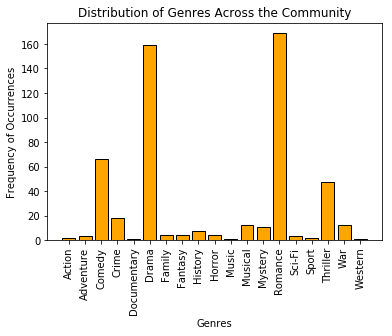

Dominant Genre: Romance
Community Number:  2
Length of Community:  50475
Genres Found:  49143
Counter({'Drama': 9502, 'Thriller': 8635, 'Short': 6547, 'Comedy': 4676, 'Romance': 4068, 'Sci-Fi': 2188, 'Horror': 1904, 'Documentary': 1395, 'War': 1208, 'Fantasy': 1054, 'Family': 999, 'Action': 983, 'Mystery': 966, 'Sport': 905, 'Crime': 849, 'Music': 789, 'Musical': 559, 'Adventure': 548, 'Western': 548, 'History': 380, 'Animation': 273, 'Adult': 72, 'Biography': 38, 'News': 36, 'Reality-TV': 7, 'Game-Show': 6, 'Talk-Show': 4, 'Film-Noir': 4})


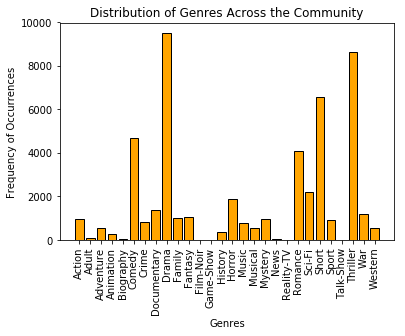

Dominant Genre: Drama
Community Number:  3
Length of Community:  4821
Genres Found:  4714
Counter({'Adult': 2156, 'Comedy': 457, 'Horror': 423, 'Drama': 368, 'Thriller': 355, 'Short': 246, 'Sci-Fi': 154, 'Romance': 113, 'Documentary': 93, 'Fantasy': 73, 'Crime': 61, 'Mystery': 54, 'Western': 29, 'Action': 24, 'Animation': 23, 'Musical': 16, 'History': 14, 'Music': 14, 'War': 13, 'Sport': 11, 'Adventure': 8, 'Family': 6, 'Biography': 1, 'Reality-TV': 1, 'News': 1})


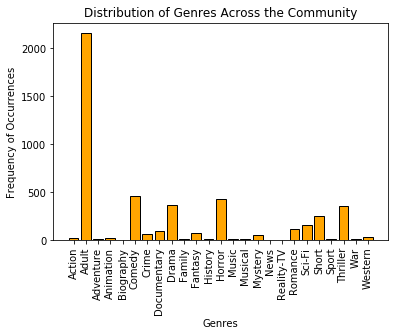

Dominant Genre: Adult
Community Number:  4
Length of Community:  27211
Genres Found:  22171
Counter({'Drama': 6777, 'Comedy': 4911, 'Thriller': 1736, 'Romance': 1699, 'Short': 1626, 'Western': 662, 'War': 633, 'Crime': 535, 'Musical': 452, 'Adult': 419, 'Horror': 400, 'Adventure': 390, 'History': 363, 'Mystery': 312, 'Documentary': 290, 'Fantasy': 287, 'Sci-Fi': 239, 'Family': 114, 'Music': 107, 'Action': 81, 'Sport': 75, 'Biography': 39, 'Animation': 19, 'Film-Noir': 2, 'News': 2, 'Talk-Show': 1})


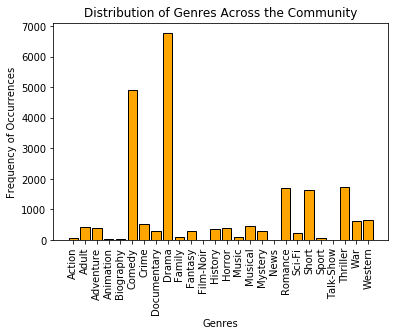

Dominant Genre: Drama
Community Number:  5
Length of Community:  6928
Genres Found:  6204
Counter({'Drama': 2486, 'Romance': 699, 'Comedy': 659, 'War': 612, 'Family': 211, 'History': 209, 'Thriller': 198, 'Crime': 184, 'Short': 168, 'Sci-Fi': 113, 'Musical': 112, 'Action': 106, 'Fantasy': 103, 'Mystery': 86, 'Adventure': 83, 'Sport': 55, 'Music': 29, 'Biography': 22, 'Horror': 21, 'Animation': 17, 'Western': 16, 'Documentary': 13, 'Adult': 1, 'News': 1})


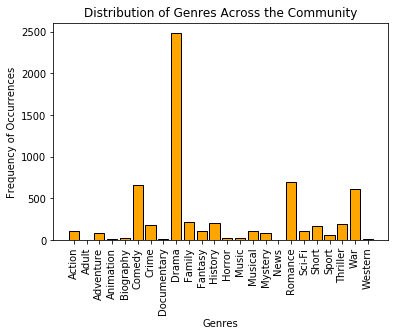

Dominant Genre: Drama
Community Number:  6
Length of Community:  34936
Genres Found:  34275
Counter({'Short': 10906, 'Drama': 6545, 'Western': 5578, 'Romance': 3459, 'Comedy': 2015, 'Thriller': 1010, 'War': 869, 'Mystery': 829, 'Musical': 617, 'Adventure': 419, 'Sport': 403, 'Sci-Fi': 320, 'Film-Noir': 214, 'Music': 210, 'Crime': 185, 'Horror': 148, 'Family': 143, 'History': 129, 'Fantasy': 98, 'Action': 95, 'Documentary': 81, 'Biography': 1, 'News': 1})


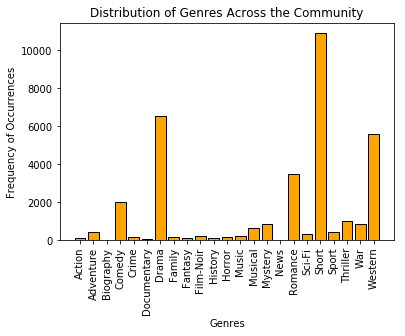

Dominant Genre: Short
Community Number:  7
Length of Community:  1595
Genres Found:  1479
Counter({'Drama': 610, 'War': 257, 'Comedy': 158, 'Romance': 121, 'Short': 85, 'Thriller': 79, 'Family': 32, 'Fantasy': 19, 'History': 17, 'Horror': 14, 'Documentary': 14, 'Crime': 12, 'Musical': 12, 'Western': 10, 'Sci-Fi': 9, 'Music': 7, 'Action': 6, 'Sport': 5, 'Mystery': 5, 'Adventure': 3, 'Animation': 2, 'Biography': 2})


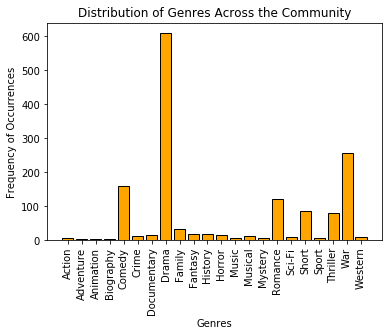

Dominant Genre: Drama
Community Number:  8
Length of Community:  12539
Genres Found:  8780
Counter({'Drama': 2602, 'Comedy': 1994, 'Romance': 993, 'Short': 603, 'Thriller': 336, 'Crime': 324, 'Musical': 312, 'Family': 287, 'War': 277, 'Fantasy': 200, 'Music': 144, 'History': 121, 'Sci-Fi': 118, 'Adventure': 106, 'Mystery': 92, 'Documentary': 74, 'Horror': 69, 'Western': 49, 'Sport': 37, 'Action': 12, 'Animation': 10, 'Adult': 9, 'Biography': 7, 'Reality-TV': 2, 'News': 1, 'Film-Noir': 1})


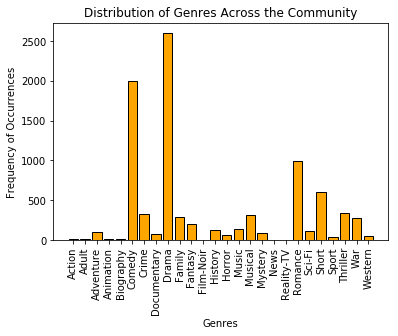

Dominant Genre: Drama
Community Number:  9
Length of Community:  6196
Genres Found:  5901
Counter({'Drama': 1856, 'Comedy': 705, 'Thriller': 693, 'Western': 546, 'Romance': 498, 'Action': 300, 'Musical': 291, 'Mystery': 188, 'War': 143, 'Family': 136, 'Fantasy': 102, 'Sci-Fi': 100, 'Short': 83, 'Horror': 76, 'Crime': 51, 'Adventure': 37, 'History': 36, 'Music': 23, 'Documentary': 17, 'Sport': 15, 'Animation': 4, 'Biography': 1})


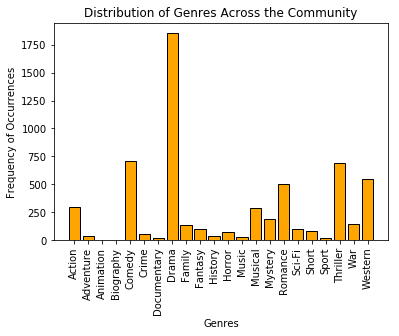

Dominant Genre: Drama
Community Number:  10
Length of Community:  4466
Genres Found:  3910
Counter({'Drama': 1521, 'Comedy': 913, 'Musical': 305, 'Romance': 259, 'Thriller': 184, 'Crime': 135, 'Family': 97, 'Adventure': 65, 'Horror': 50, 'Short': 44, 'Documentary': 43, 'Adult': 43, 'Western': 42, 'Fantasy': 37, 'History': 29, 'Mystery': 29, 'Sci-Fi': 25, 'Action': 25, 'Music': 24, 'War': 23, 'Sport': 10, 'Biography': 5, 'Animation': 2})


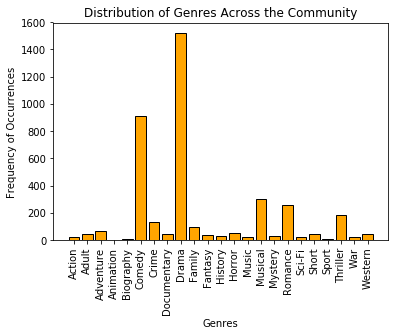

Dominant Genre: Drama
Community Number:  11
Length of Community:  4876
Genres Found:  4153
Counter({'Drama': 1320, 'Comedy': 716, 'Short': 550, 'Family': 444, 'Romance': 300, 'Thriller': 255, 'Crime': 150, 'War': 80, 'Mystery': 45, 'Musical': 43, 'Fantasy': 42, 'Documentary': 35, 'Sci-Fi': 31, 'Music': 30, 'Horror': 26, 'History': 24, 'Sport': 17, 'Adventure': 13, 'Western': 11, 'Animation': 9, 'Action': 8, 'Biography': 4})


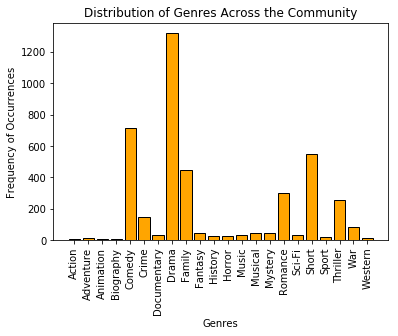

Dominant Genre: Drama
Community Number:  12
Length of Community:  2269
Genres Found:  1653
Counter({'Drama': 672, 'Comedy': 284, 'Romance': 144, 'Short': 98, 'History': 76, 'War': 72, 'Thriller': 64, 'Crime': 32, 'Musical': 31, 'Family': 30, 'Fantasy': 30, 'Sci-Fi': 21, 'Adventure': 20, 'Action': 15, 'Western': 14, 'Horror': 10, 'Music': 9, 'Mystery': 9, 'Animation': 8, 'Sport': 7, 'Documentary': 7})


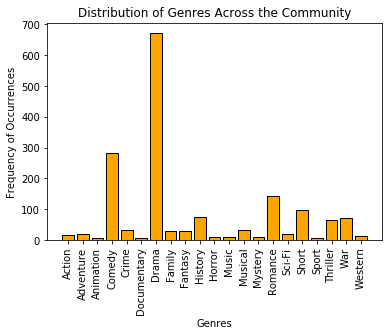

Dominant Genre: Drama
Community Number:  13
Length of Community:  9628
Genres Found:  5888
Counter({'Drama': 2453, 'Comedy': 679, 'Romance': 508, 'Thriller': 389, 'Action': 244, 'Sci-Fi': 230, 'Horror': 220, 'Crime': 196, 'War': 167, 'Mystery': 166, 'Short': 141, 'Fantasy': 112, 'History': 81, 'Musical': 52, 'Family': 43, 'Sport': 43, 'Music': 40, 'Animation': 34, 'Adventure': 34, 'Adult': 19, 'Documentary': 16, 'Western': 10, 'Biography': 10, 'Film-Noir': 1})


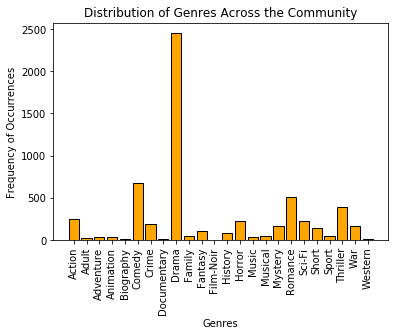

Dominant Genre: Drama
Community Number:  14
Length of Community:  12636
Genres Found:  9530
Counter({'Drama': 2658, 'Romance': 2220, 'Thriller': 1334, 'Action': 777, 'Family': 763, 'Comedy': 584, 'Musical': 373, 'Fantasy': 161, 'Horror': 118, 'Mystery': 114, 'Crime': 106, 'History': 90, 'War': 69, 'Sport': 34, 'Sci-Fi': 33, 'Adventure': 30, 'Short': 17, 'Music': 16, 'Documentary': 12, 'Western': 9, 'Animation': 6, 'Biography': 3, 'Reality-TV': 1, 'News': 1, 'Game-Show': 1})


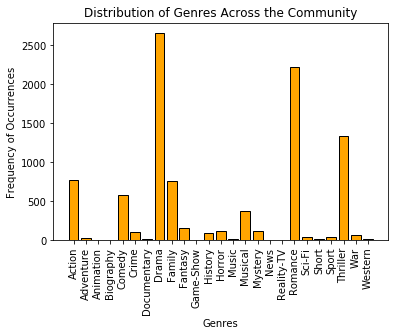

Dominant Genre: Drama
Community Number:  15
Length of Community:  1792
Genres Found:  1495
Counter({'Drama': 523, 'Comedy': 187, 'Thriller': 146, 'Romance': 141, 'Family': 101, 'Short': 97, 'War': 50, 'Action': 39, 'Horror': 37, 'Mystery': 22, 'Crime': 20, 'Sport': 20, 'Fantasy': 18, 'Musical': 16, 'Adventure': 15, 'History': 14, 'Music': 13, 'Sci-Fi': 12, 'Documentary': 12, 'Western': 5, 'Biography': 3, 'Animation': 2, 'Adult': 2})


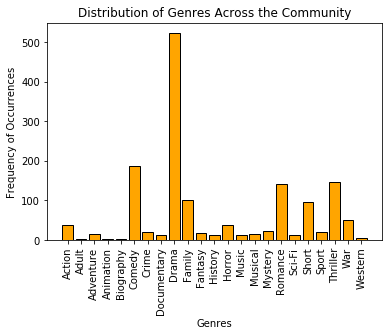

Dominant Genre: Drama
Community Number:  16
Length of Community:  3516
Genres Found:  3196
Counter({'Drama': 1085, 'Romance': 1022, 'Comedy': 308, 'Adventure': 293, 'Crime': 87, 'War': 78, 'Thriller': 62, 'Western': 52, 'Fantasy': 49, 'History': 34, 'Family': 28, 'Action': 28, 'Sci-Fi': 20, 'Musical': 17, 'Mystery': 12, 'Horror': 5, 'Short': 4, 'Documentary': 3, 'Sport': 3, 'Biography': 3, 'Music': 2, 'Animation': 1})


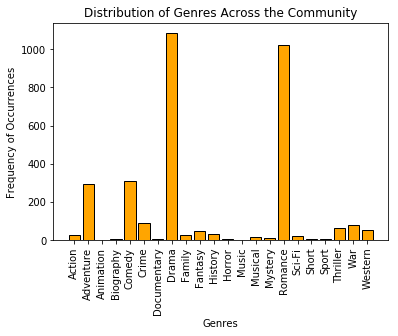

Dominant Genre: Drama
Community Number:  17
Length of Community:  7272
Genres Found:  6202
Counter({'Drama': 1779, 'Romance': 960, 'Comedy': 855, 'Action': 529, 'Thriller': 489, 'Adventure': 404, 'Horror': 267, 'Fantasy': 219, 'Crime': 174, 'War': 117, 'Musical': 116, 'Mystery': 92, 'Sci-Fi': 49, 'History': 48, 'Family': 26, 'Documentary': 22, 'Sport': 21, 'Short': 11, 'Western': 9, 'Music': 6, 'Biography': 4, 'Animation': 4, 'Adult': 1})


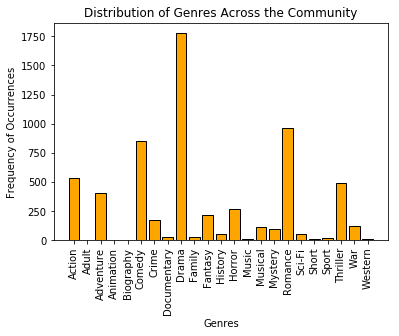

Dominant Genre: Drama
Community Number:  18
Length of Community:  1149
Genres Found:  1050
Counter({'Drama': 319, 'Comedy': 255, 'Romance': 117, 'Thriller': 78, 'Short': 77, 'War': 40, 'Musical': 34, 'Music': 23, 'Family': 23, 'Fantasy': 14, 'Crime': 13, 'Documentary': 12, 'History': 11, 'Horror': 8, 'Sport': 8, 'Western': 7, 'Sci-Fi': 5, 'Mystery': 3, 'Adventure': 1, 'Biography': 1, 'Animation': 1})


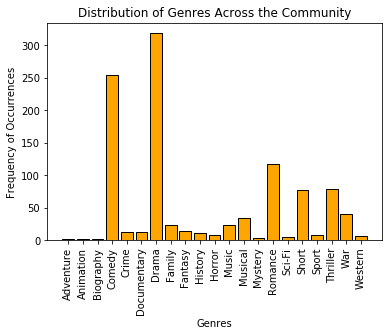

Dominant Genre: Drama
Community Number:  19
Length of Community:  844
Genres Found:  792
Counter({'Drama': 321, 'Romance': 160, 'Thriller': 83, 'Comedy': 62, 'Action': 40, 'War': 39, 'Crime': 22, 'Horror': 13, 'Sport': 10, 'Mystery': 10, 'History': 7, 'Adventure': 5, 'Fantasy': 4, 'Sci-Fi': 4, 'Musical': 4, 'Family': 4, 'Documentary': 2, 'Music': 1, 'Western': 1})


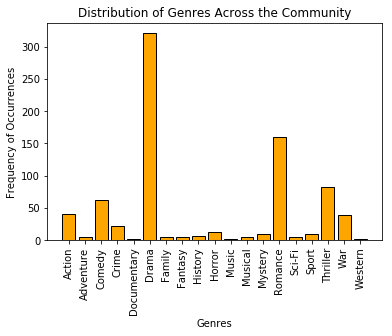

Dominant Genre: Drama
Community Number:  20
Length of Community:  2115
Genres Found:  2103
Counter({'Drama': 692, 'Comedy': 640, 'Romance': 422, 'War': 89, 'Thriller': 78, 'Crime': 42, 'Musical': 34, 'Mystery': 16, 'Short': 14, 'Sci-Fi': 12, 'History': 10, 'Family': 10, 'Western': 7, 'Documentary': 7, 'Adventure': 7, 'Music': 5, 'Sport': 5, 'Fantasy': 3, 'Horror': 3, 'Action': 3, 'Biography': 2, 'Adult': 2})


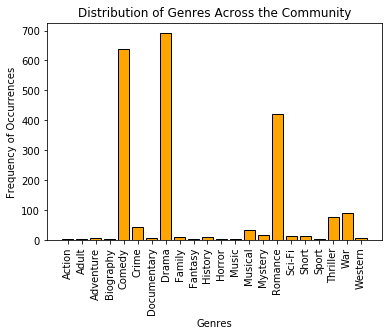

Dominant Genre: Drama
Community Number:  21
Length of Community:  5938
Genres Found:  4881
Counter({'Drama': 1636, 'Action': 847, 'Romance': 718, 'Comedy': 676, 'Fantasy': 179, 'Thriller': 171, 'Horror': 153, 'War': 146, 'Musical': 98, 'Sci-Fi': 53, 'Sport': 27, 'Family': 26, 'Crime': 25, 'Western': 23, 'Adventure': 20, 'Biography': 19, 'Short': 16, 'History': 14, 'Mystery': 12, 'Music': 11, 'Documentary': 6, 'Adult': 5})


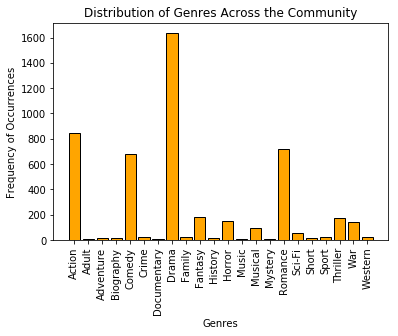

Dominant Genre: Drama
Community Number:  22
Length of Community:  23
Genres Found:  23
Counter({'Drama': 8, 'Comedy': 4, 'Thriller': 3, 'Sport': 3, 'War': 1, 'Fantasy': 1, 'Romance': 1, 'Western': 1, 'Crime': 1})


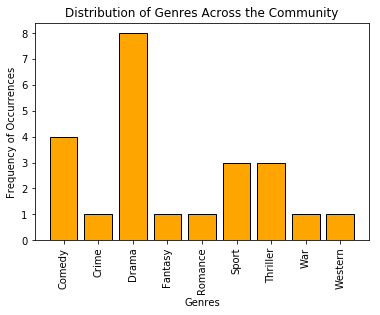

Dominant Genre: Drama
Community Number:  23
Length of Community:  623
Genres Found:  299
Counter({'Drama': 104, 'Comedy': 57, 'Action': 29, 'Romance': 20, 'War': 18, 'Thriller': 18, 'Mystery': 12, 'History': 11, 'Crime': 7, 'Family': 5, 'Musical': 4, 'Documentary': 3, 'Fantasy': 3, 'Music': 2, 'Sci-Fi': 2, 'Biography': 1, 'Adventure': 1, 'Horror': 1, 'Short': 1})


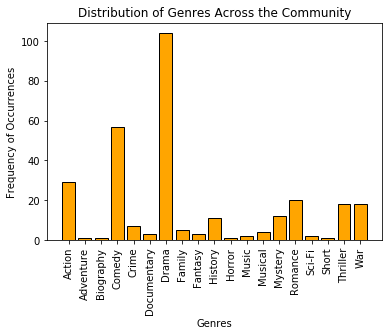

Dominant Genre: Drama
Community Number:  24
Length of Community:  14
Genres Found:  14
Counter({'Thriller': 11, 'Short': 2, 'Sport': 1})


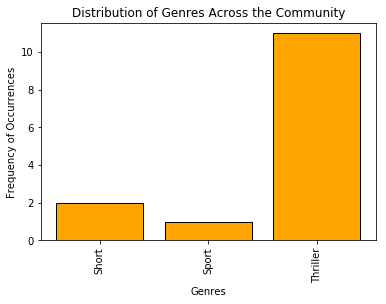

Dominant Genre: Thriller
Community Number:  25
Length of Community:  433
Genres Found:  387
Counter({'Drama': 240, 'Romance': 45, 'Action': 40, 'Family': 15, 'Fantasy': 14, 'Musical': 13, 'Comedy': 8, 'History': 4, 'Crime': 3, 'Mystery': 2, 'Horror': 1, 'Thriller': 1, 'Sci-Fi': 1})


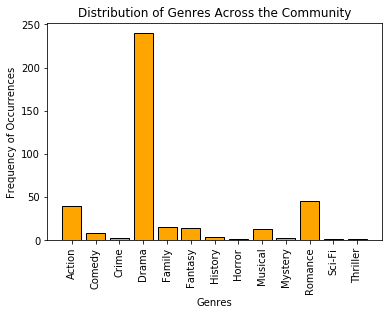

Dominant Genre: Drama
Community Number:  26
Length of Community:  405
Genres Found:  154
Counter({'Musical': 75, 'Drama': 38, 'Romance': 18, 'Action': 8, 'Thriller': 5, 'Comedy': 4, 'Biography': 2, 'Horror': 2, 'Crime': 1, 'Sport': 1})


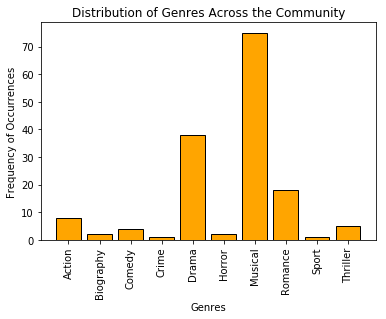

Dominant Genre: Musical
Community Number:  27
Length of Community:  17
Genres Found:  17
Counter({'Short': 17})


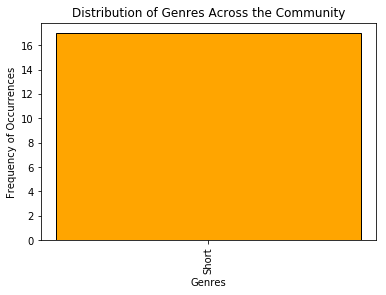

Dominant Genre: Short
Community Number:  28
Length of Community:  18
Genres Found:  18
Counter({'Short': 9, 'Drama': 3, 'Thriller': 2, 'Romance': 2, 'Comedy': 2})


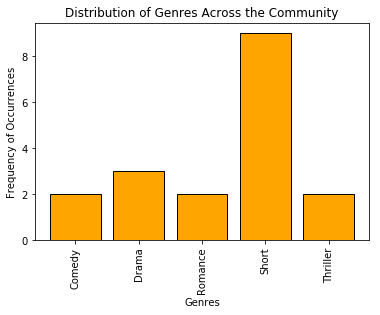

Dominant Genre: Short
Community Number:  29
Length of Community:  72
Genres Found:  72
Counter({'Short': 71, 'Western': 1})


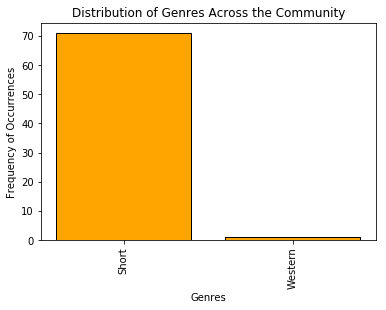

Dominant Genre: Short
Community Number:  30
Length of Community:  14
Genres Found:  1
Counter({'Short': 1})


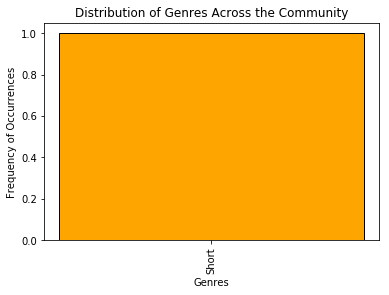

Dominant Genre: Short


In [234]:
chosen = [0, 5, 6, 13, 16, 19, 23, 25, 27, 31]
chosen = [25, 31]
communityGenres = list()
for index in range(len(communities)):
    genreList = list()
    community = communities[index]
    print("Community Number: ",(index + 1))
    print("Length of Community: ", len(community))
    
    genreCount = 0
    for movieID in community:
        movieName = movieIDMap[int(movieID)]
        if movieName in genreMap:
            genreCount += 1
            genre = genreMap[movieName]
            genreList.append(genre)
            movieGenres.append(genre)
        
    print("Genres Found: ", genreCount)
    
    communityGenres.append(genreList)
    genreDict = Counter(genreList)
    print(genreDict)
    plt.bar(genreDict.keys(), genreDict.values(), edgecolor = 'black', color = 'orange')
    plt.xticks(rotation = 90)
    plt.xlabel("Genres")
    plt.ylabel("Frequency of Occurrences")
    plt.title("Distribution of Genres Across the Community")
#     plt.plot(genreDict.keys(), genreDict.values())
#     plt.hist(genreList, align='mid')
    
    plt.show()
#     plt.plot(genreDict.keys(), genreDict.values())
#     plt.xticks(rotation = 90)
#     plt.xlabel("Genres")
#     plt.ylabel("Frequency of Occurrences")
#     plt.title("Distribution of Genres Across the Community")
#     plt.show()
    print("Dominant Genre:",max(genreDict.items(), key=operator.itemgetter(1))[0])

1


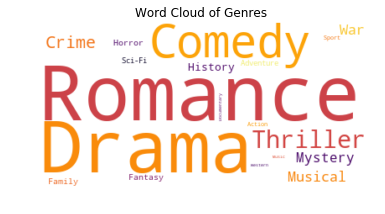

2


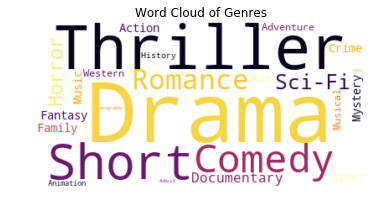

3


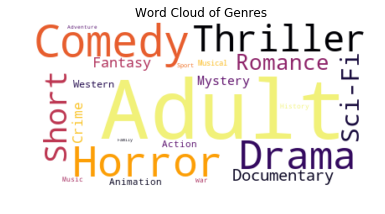

4


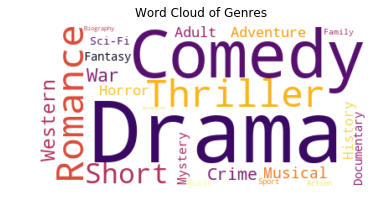

5


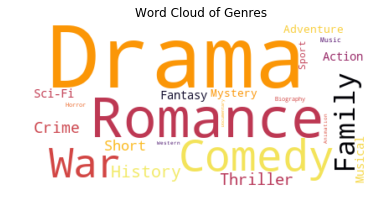

6


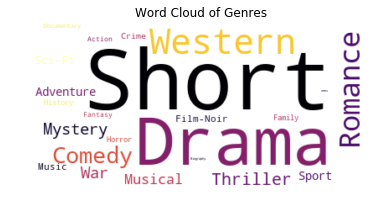

7


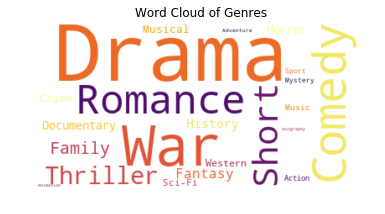

8


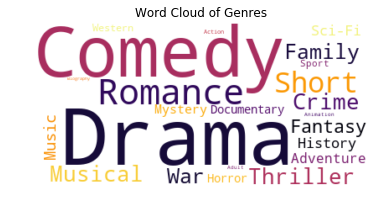

9


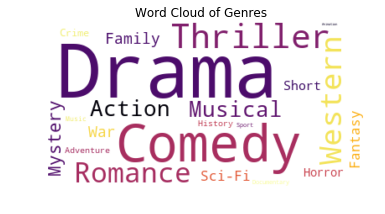

10


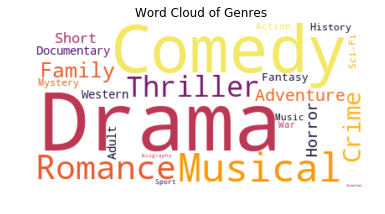

11


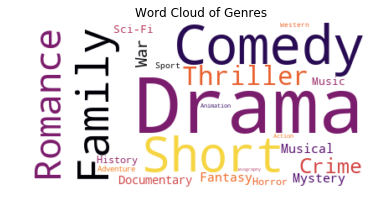

12


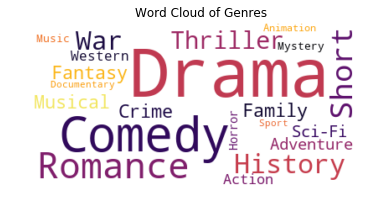

13


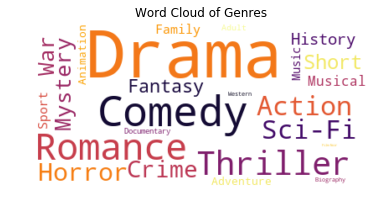

14


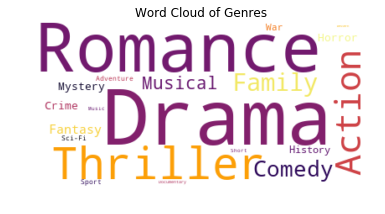

15


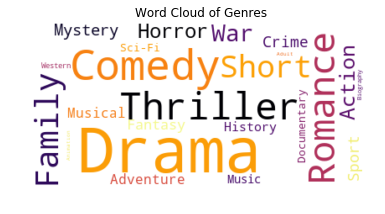

16


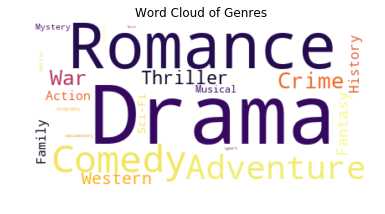

17


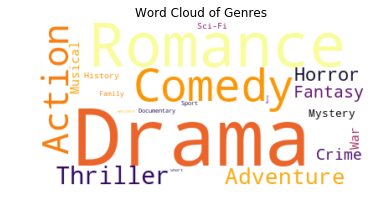

18


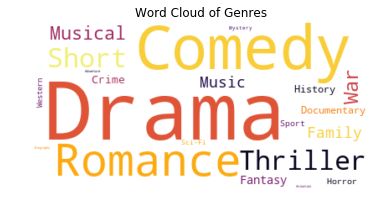

19


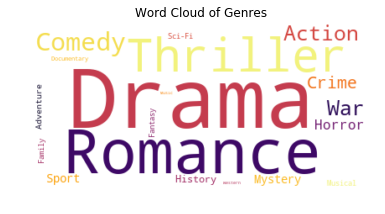

20


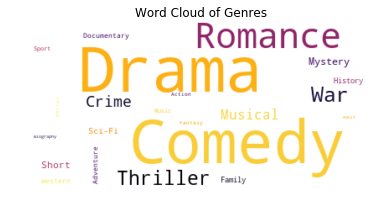

21


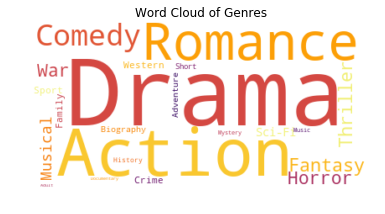

22


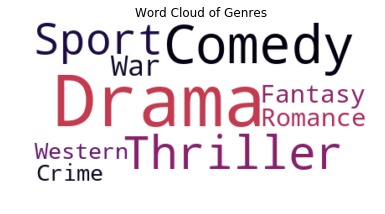

23


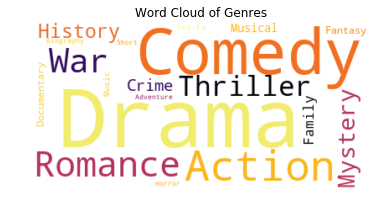

24


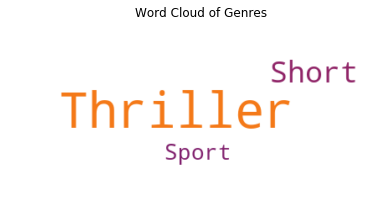

25


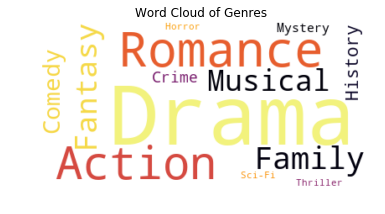

26


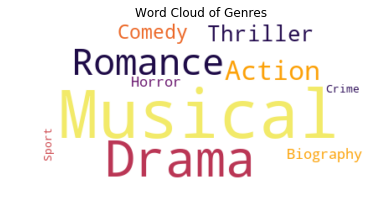

27


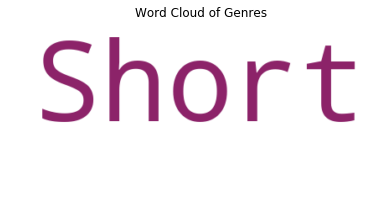

28


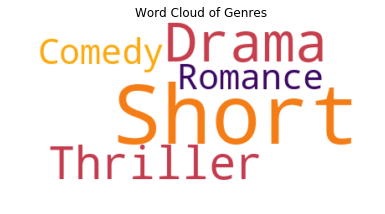

29


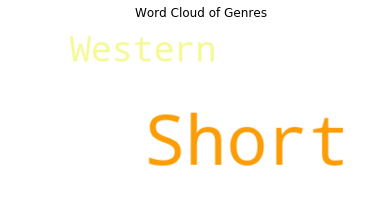

30


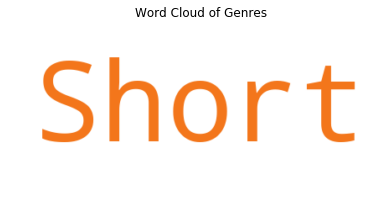

In [263]:
wordcloud = WordCloud(background_color='white', colormap='inferno')
index = 1
for genres in communityGenres:
    print(index)
    genreCount = Counter(genres)
    wordcloud.generate_from_frequencies(frequencies = genreCount)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Genres")
    plt.show()
    index += 1

1


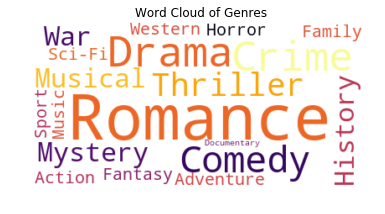

2


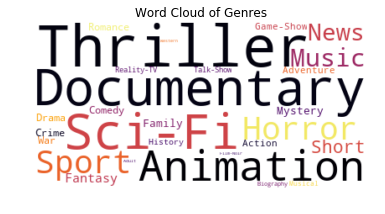

3


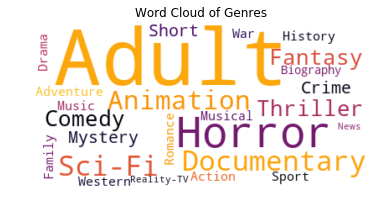

4


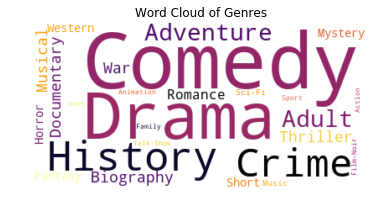

5


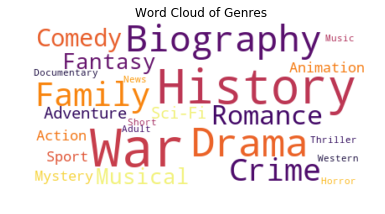

6


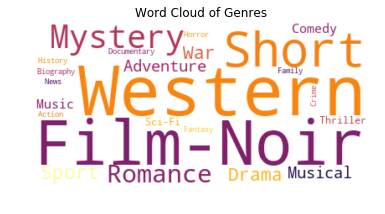

7


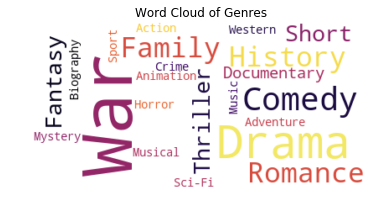

8


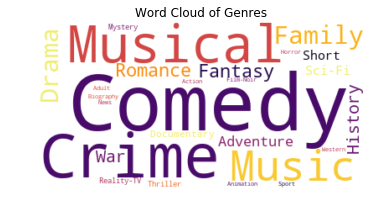

9


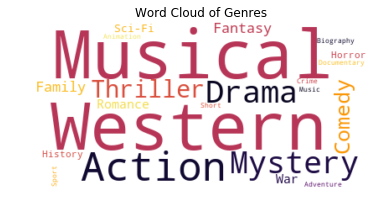

10


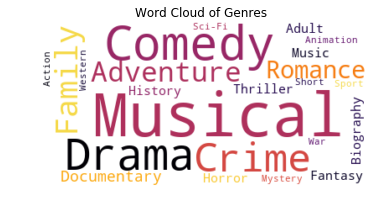

11


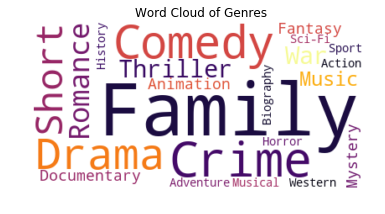

12


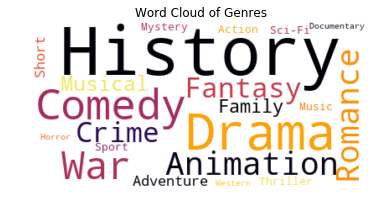

13


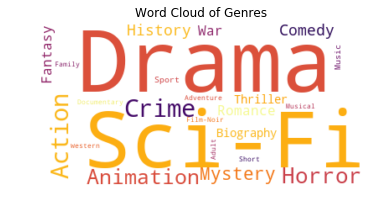

14


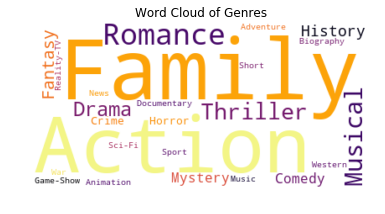

15


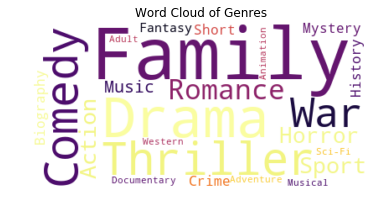

16


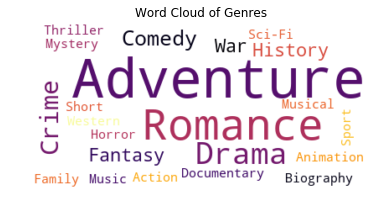

17


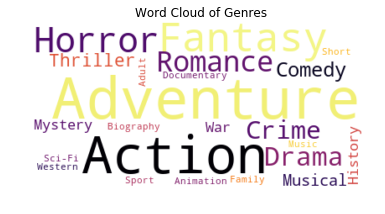

18


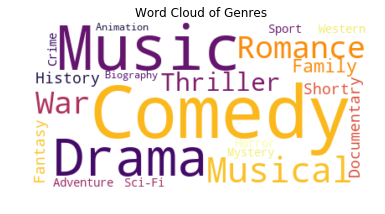

19


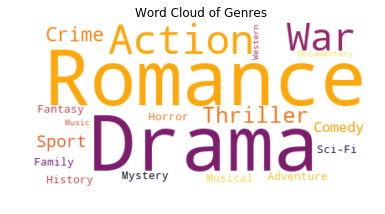

20


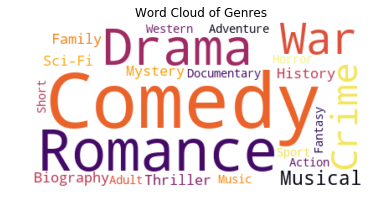

21


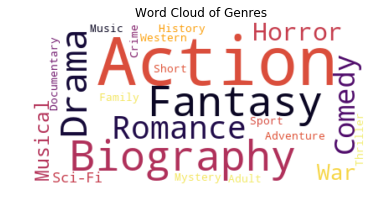

22


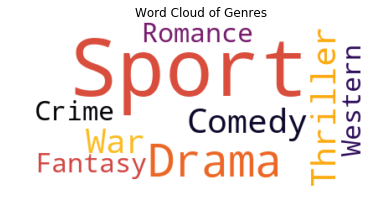

23


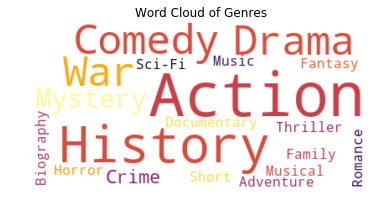

24


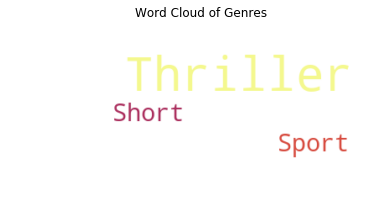

25


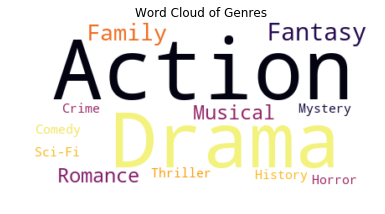

26


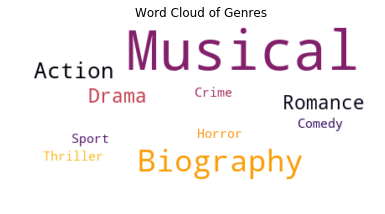

27


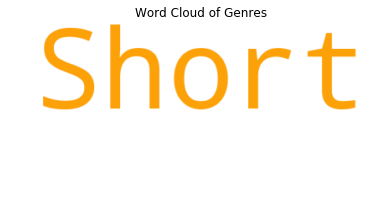

28


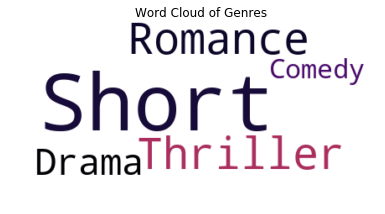

29


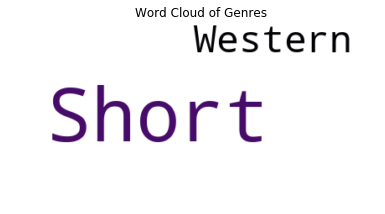

30


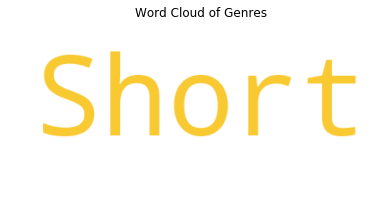

In [262]:
index = 1
for entry in data:
    print(index)
#     genreCount = Counter(genres)
    for key in entry:
        if entry[key] == 0:
            entry[key] = 1
        else:
            entry[key] = int(entry[key])
            if entry[key] == 0:
                entry[key] = 1
    wordcloud.generate_from_frequencies(frequencies = entry)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Genres")
    plt.show()
    index += 1

In [252]:
entry

{'Action': 0,
 'Adult': 230,
 'Adventure': 0,
 'Animation': 6,
 'Biography': 1,
 'Comedy': 4,
 'Crime': 2,
 'Documentary': 7,
 'Drama': 1,
 'Family': 0,
 'Fantasy': 4,
 'History': 0,
 'Horror': 24,
 'Music': 0,
 'Musical': 0,
 'Mystery': 2,
 'News': 1,
 'Reality-TV': 1,
 'Romance': 1,
 'Sci-Fi': 7,
 'Short': 2,
 'Sport': 0,
 'Thriller': 4,
 'War': 0,
 'Western': 0}

In [235]:
len(movieGenres)

179031

In [20]:
genreCount

8

## Question 8(b)

In [23]:
movieActors = pickle.load(open("movieActors_v10.pickle", "rb"))

In [24]:
genreCounts = Counter(list(genreMap.values()))

In [25]:
genreCounts

Counter({'Action': 12361,
         'Adult': 63214,
         'Adventure': 6872,
         'Animation': 3362,
         'Biography': 1789,
         'Comedy': 49712,
         'Crime': 6676,
         'Documentary': 79672,
         'Drama': 109525,
         'Erotica': 1,
         'Family': 13421,
         'Fantasy': 7472,
         'Film-Noir': 224,
         'Game-Show': 480,
         'History': 7460,
         'Horror': 13630,
         'Music': 20418,
         'Musical': 8334,
         'Mystery': 7130,
         'News': 3277,
         'Reality-TV': 2741,
         'Romance': 31267,
         'Sci-Fi': 11007,
         'Short': 448733,
         'Sport': 16905,
         'Talk-Show': 1563,
         'Thriller': 55458,
         'War': 14000,
         'Western': 14287})

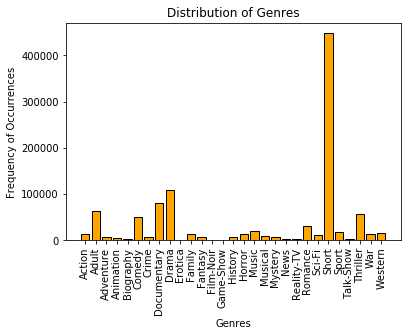

In [255]:
plt.bar(genreCounts.keys(), genreCounts.values(), edgecolor = 'black', color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel("Genres")
plt.ylabel("Frequency of Occurrences")
plt.title("Distribution of Genres")
plt.show()


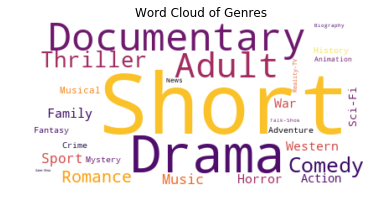

In [261]:
wordcloud.generate_from_frequencies(frequencies = genreCounts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Genres")
plt.show()

In [26]:
len(genreCounts)

29

In [27]:
numMoviesWithGenre = len(genreMap)

In [28]:
numMoviesWithGenre

1010991

In [232]:
communityGenres[0]

['Crime',
 'Drama',
 'Drama',
 'Romance',
 'War',
 'Romance',
 'Romance',
 'Comedy',
 'Romance',
 'Sport',
 'Comedy',
 'War',
 'War',
 'Romance',
 'Musical',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Romance',
 'Romance',
 'Romance',
 'Drama',
 'Thriller',
 'Western',
 'Comedy',
 'Romance',
 'Comedy',
 'Romance',
 'Crime',
 'Romance',
 'Romance',
 'Romance',
 'Romance',
 'Mystery',
 'Drama',
 'Musical',
 'Thriller',
 'Drama',
 'Drama',
 'Thriller',
 'Thriller',
 'Drama',
 'Comedy',
 'Music',
 'Comedy',
 'Comedy',
 'Thriller',
 'Comedy',
 'Romance',
 'Drama',
 'Comedy',
 'Romance',
 'Romance',
 'Romance',
 'Thriller',
 'Romance',
 'Romance',
 'Thriller',
 'Romance',
 'Comedy',
 'Romance',
 'Drama',
 'Thriller',
 'Thriller',
 'Romance',
 'Drama',
 'Drama',
 'Romance',
 'Crime',
 'Comedy',
 'Romance',
 'Drama',
 'Romance',
 'Romance',
 'Drama',
 'Comedy',
 'Romance',
 'Drama',
 'Romance',
 'Romance',
 'Comedy',
 'Comedy',
 'Romance',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comed

In [29]:
for index in range(len(communities)):
    genres = Counter(communityGenres[index])
    numGenres = len(communityGenres[index])
    
    scores = dict()
    for genre in genres:
        c_i = genres[genre]
        p_i = c_i / numGenres
        q_i = genreCounts[genre] / numMoviesWithGenre
        
        score = np.log(c_i) * (p_i / q_i)
        scores[genre] = score
    print(index + 1)
    sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse = True)
    print(sorted_scores)

1
[('Romance', 53.29308077437637), ('Crime', 14.97860704423587), ('Drama', 14.14358455933176), ('Comedy', 10.691102180557673), ('Mystery', 7.110414394583661), ('Musical', 6.8770055289819805), ('Thriller', 6.2715166417864445), ('War', 4.093783148466844), ('History', 3.509486216099313), ('Fantasy', 1.4263960585353475), ('Adventure', 0.9218157025031823), ('Family', 0.7941309402709273), ('Horror', 0.7819538774303827), ('Sci-Fi', 0.5755171715818905), ('Action', 0.21555762780875568), ('Sport', 0.1576165535252309), ('Western', 0.0), ('Music', 0.0), ('Documentary', 0.0)]
2
[('Sci-Fi', 31.450842496583622), ('Thriller', 29.032436642051213), ('Romance', 22.24481328902312), ('Horror', 21.702119168515623), ('Fantasy', 20.198555359268514), ('Mystery', 19.157106657949683), ('Crime', 17.644053244458593), ('Comedy', 16.351808515502636), ('Drama', 16.3473613018306), ('War', 12.597439401839358), ('Action', 11.273094573374879), ('Family', 10.57645858448387), ('Adventure', 10.345606531004043), ('Animation'

In [236]:
movieGenreCounter = Counter(movieGenres)
totalMovies = len(movieGenres)

In [239]:
dominantGenre = list()

In [248]:
data = list()
for index in range(len(communities)):
    genres = Counter(communityGenres[index])
    numGenres = len(communityGenres[index])
    
    scores = dict()
    for genre in genres:
        c_i = genres[genre]
        p_i = c_i / numGenres
        q_i = movieGenreCounter[genre] / totalMovies
        
        score = np.log(c_i) * (p_i / q_i)
        scores[genre] = score
    print(index + 1)
    sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse = True)
    print(sorted_scores)
    dominantGenre.append(sorted_scores[0][0])
    data.append(dict(sorted_scores))

1
[('Romance', 15.632484967382222), ('Drama', 5.927731229648722), ('Crime', 5.477255484013099), ('Comedy', 4.302457634407593), ('Thriller', 3.7414085392470193), ('Mystery', 2.9082300696949526), ('Musical', 2.820802362221907), ('History', 2.6814414794686177), ('War', 2.024585457664956), ('Fantasy', 0.6678605393310223), ('Family', 0.532104280842816), ('Horror', 0.47505005893517965), ('Adventure', 0.4478168909008), ('Sci-Fi', 0.29978121638335226), ('Sport', 0.2746469563663371), ('Action', 0.11125759750940041), ('Western', 0.0), ('Music', 0.0), ('Documentary', 0.0)]
2
[('Thriller', 17.319926354652452), ('Documentary', 17.05166831786052), ('Sci-Fi', 16.38243354927508), ('Animation', 13.443213360130276), ('Horror', 13.184400368856155), ('Sport', 13.064939084067566), ('Music', 12.731932609560335), ('News', 10.929752349004492), ('Short', 9.777651648592856), ('Fantasy', 9.457273802200632), ('Mystery', 7.835446788226868), ('Family', 7.0867140462259695), ('Drama', 6.851358204471368), ('Comedy', 6

In [241]:
dominantGenre

['Romance',
 'Thriller',
 'Adult',
 'Comedy',
 'War',
 'Western',
 'War',
 'Comedy',
 'Musical',
 'Musical',
 'Family',
 'History',
 'Drama',
 'Family',
 'Family',
 'Adventure',
 'Adventure',
 'Comedy',
 'Romance',
 'Comedy',
 'Action',
 'Sport',
 'Action',
 'Thriller',
 'Action',
 'Musical',
 'Short',
 'Short',
 'Short',
 'Short']

In [242]:
dominantGenreCounter = Counter(dominantGenre)

Text(0.5,1,'Distribution of Genres')

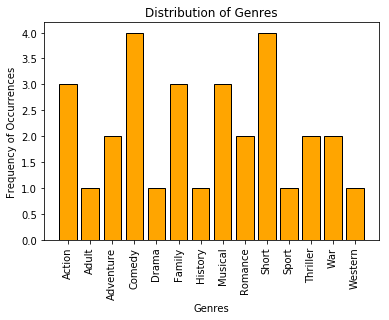

In [243]:
plt.bar(dominantGenreCounter.keys(), dominantGenreCounter.values(), edgecolor = 'black', color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel("Genres")
plt.ylabel("Frequency of Occurrences")
plt.title("Distribution of Genres")

Text(0.5,1,'Distribution of Genres')

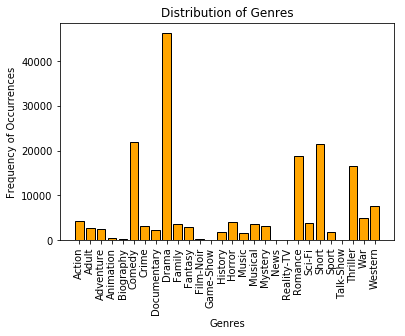

In [244]:
plt.bar(movieGenreCounter.keys(), movieGenreCounter.values(), edgecolor = 'black', color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel("Genres")
plt.ylabel("Frequency of Occurrences")
plt.title("Distribution of Genres")

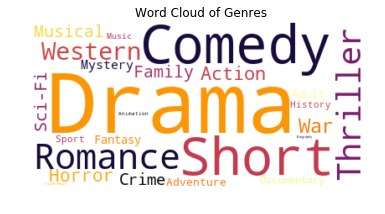

In [260]:
wordcloud.generate_from_frequencies(frequencies = movieGenreCounter)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Genres")
plt.show()

In [30]:
movieMap['Batman v Superman: Dawn of Justice (2016)']

12651

In [31]:
movieMap['Mission: Impossible - Rogue Nation (2015)']

48394

In [32]:
movieActors[12651]

[447,
 1000,
 1180,
 3203,
 3995,
 6289,
 6735,
 8397,
 9491,
 10633,
 10871,
 11489,
 12483,
 16227,
 19329,
 19580,
 21373,
 21374,
 23249,
 23759,
 26435,
 27502,
 28283,
 31144,
 32173,
 37794,
 38739,
 39939,
 40104,
 40204,
 43255,
 44269,
 45024,
 45077,
 45402,
 46132,
 46692,
 47311,
 48393,
 48702,
 54072,
 54818,
 56652,
 57822,
 58571,
 60537,
 68893,
 70506,
 74706,
 79300,
 82282,
 85828,
 86380,
 86785,
 87540,
 90063,
 91781,
 92547,
 93555,
 95615,
 95960,
 96544,
 99571,
 106438,
 110904,
 112183]

In [78]:
actorIDMap['34024']

'Keaton, Michael'

In [86]:
actorMap['Watson, Emma (II)']

'111280'

In [29]:
movieMap['Minions (2015)']

'100845'

## Question 8(c)

In [192]:
communities[27]

['300330',
 '300331',
 '300332',
 '300333',
 '300334',
 '300335',
 '300336',
 '300337',
 '218959',
 '300338',
 '316314',
 '316315',
 '316316',
 '316317',
 '316318',
 '316319',
 '316320',
 '357857']

In [194]:
#choosing communtiy no. 27 - size 17
#creating edge list

bipartite_edgeList = list()
movies = list()
actors = list()
for movie in communities[27]:
    actorList = movieActors[int(movie)]
    movieName = movieIDMap[int(movie)]
    movies.append(movieName)
    print(movieName)
    for actor in actorList:
        actorName = actorIDMap[actor]
        edge = [movieName, actorName]
        bipartite_edgeList.append(edge)
        actors.append(actorName)

Street Fight (2012)
Inner Joy of a Broken Heart (2011)
Is This It? (2012)
Call of Babylon (2012)
Life of a Spy (2012)
Booze Culture (2012)
Losers in Love (2011)
Boycie (2011)
Unconditional Love (2010)
The Shadow of Death (2011)
Be My Valentine (2011)
Legion of Evil (2010)
Love House (2011)
The Hope Within (2009)
White Cobra (2014)
A Schoolboy Error Production (2009)
The Book of Life (2013/I)
Fear of the Park (2010)


In [195]:
bipartite_edgeList

[['Street Fight (2012)', 'Hislop, Tom'],
 ['Street Fight (2012)', 'Joiner, Craig'],
 ['Street Fight (2012)', 'McKay, Reuben'],
 ['Street Fight (2012)', 'Noble, Graeme'],
 ['Street Fight (2012)', 'Noble, John-William'],
 ['Street Fight (2012)', 'Sandison, Martin'],
 ['Street Fight (2012)', 'Taylor, Stuart (X)'],
 ['Street Fight (2012)', 'Kilpatrick, Kayleigh'],
 ['Street Fight (2012)', 'McKay, Hannah'],
 ['Street Fight (2012)', 'Simpson, Julia (II)'],
 ['Inner Joy of a Broken Heart (2011)', 'Hislop, Tom'],
 ['Inner Joy of a Broken Heart (2011)', 'McKay, Reuben'],
 ['Inner Joy of a Broken Heart (2011)', 'Taylor, Stuart (X)'],
 ['Inner Joy of a Broken Heart (2011)', 'Kilpatrick, Kayleigh'],
 ['Inner Joy of a Broken Heart (2011)', 'McKay, Hannah'],
 ['Inner Joy of a Broken Heart (2011)', 'Simpson, Julia (II)'],
 ['Is This It? (2012)', 'Hislop, Tom'],
 ['Is This It? (2012)', 'Joiner, Craig'],
 ['Is This It? (2012)', 'McKay, Reuben'],
 ['Is This It? (2012)', 'Noble, Graeme'],
 ['Is This It? 

In [196]:
len(bipartite_edgeList)

138

In [197]:
print(len(movies))
print(len(actors))
actors = list(set(actors))
print(len(actors))


18
138
14


In [198]:
actors

['Sandison, Martin',
 'Taylor, Stuart (X)',
 'McKay, Hannah',
 'Marshall, Scarlett',
 'Simpson, Julia (II)',
 'Kilpatrick, Kayleigh',
 'Moir, Shaun',
 'Chan, Juju',
 'Noble, John-William',
 'McKay, Reuben',
 'Dasz, Steven',
 'Hislop, Tom',
 'Joiner, Craig',
 'Noble, Graeme']

In [199]:
# write the edgeList to file
fileHandle = open('bipartiteEdgelist_v11.txt', 'w', encoding='ISO-8859-1')
for edge in bipartite_edgeList:
    line = "\t\t".join(str(element) for element in edge)
    fileHandle.write("%s\n" % line)

In [200]:
line

'Fear of the Park (2010)\t\tSimpson, Julia (II)'

In [55]:
fileHandle.close()

In [49]:
data = pd.read_csv('bipartiteEdgelist_v10.txt', sep="\t", header=None, encoding = 'ISO-8859-1')
data.columns = ["V1", "V2"]

In [50]:
data.head()

,V1,V2
0,Nissekamp (2008),"Egeland, Preben"
1,Nissekamp (2008),"Jordell, Fredrik"
2,Nissekamp (2008),"Kvale, Robert"
3,Nissekamp (2008),"Syvertsen, Bjørn"
4,Nissekamp (2008),"Væting, Rune"


In [51]:
data.shape

(113, 2)

In [52]:
data.to_csv('bipartiteEdgelist_v10.csv', index=False)

In [201]:
fileHandle = open('bipartiteActors_v11.txt', 'w', encoding='ISO-8859-1')
for actor in actors:
    line = actor
    fileHandle.write("%s\n" % line)

In [202]:
fileHandle.close()

In [203]:
fileHandle = open('bipartiteMovies_v11.txt', 'w', encoding='ISO-8859-1')
for movie in movies:
    line = movie
    fileHandle.write("%s\n" % line)

In [204]:
fileHandle.close()

In [205]:
actorMap['McKay, Reuben']

44084

In [206]:
moviesEP = actorMovies[44084]

In [207]:
genreEP = list()
ctr = 0
for movie in moviesEP:
    movieName = movieIDMap[movie]
    if movieName in genreMap:
        genre = genreMap[movieName]
        print(movieName, genre)
        genreEP.append(genre)
        if movieName in movies:
            ctr += 1

Bitter Love (2011) Short
Fear of the Park (2010) Comedy
The Book of Life (2013/I) Short
Street Fight (2012) Drama
Inner Joy of a Broken Heart (2011) Short
Is This It? (2012) Short
Call of Babylon (2012) Thriller
Life of a Spy (2012) Short
Booze Culture (2012) Short
Losers in Love (2011) Romance
Unconditional Love (2010) Drama
The Shadow of Death (2011) Thriller
Boycie (2011) Short
Pit of Despair (2012) Short
Be My Valentine (2011) Short
Legion of Evil (2010) Comedy
Love House (2011) Romance
The Hope Within (2009) Drama
White Cobra (2014) Short
A Schoolboy Error Production (2009) Short


In [208]:
counterEP = Counter(genreEP)

In [209]:
ctr

18

In [210]:
counterEP

Counter({'Comedy': 2, 'Drama': 3, 'Romance': 2, 'Short': 11, 'Thriller': 2})

In [211]:
actorMap['Noble, John-William']

49105

In [212]:
moviesEP = actorMovies[49105]

In [213]:
genreEP = list()
ctr = 0
for movie in moviesEP:
    movieName = movieIDMap[movie]
    if movieName in genreMap:
        genre = genreMap[movieName]
        print(movieName, genre)
        genreEP.append(genre)
        if movieName in movies:
            ctr += 1

The Book of Life (2013/I) Short
Desolation (2012) Short
Forever Together (2012) Short
Fear of the Park (2010) Comedy
Street Fight (2012) Drama
Is This It? (2012) Short
Call of Babylon (2012) Thriller
Life of a Spy (2012) Short
Booze Culture (2012) Short
Losers in Love (2011) Romance
Boycie (2011) Short
The Shadow of Death (2011) Thriller
Unconditional Love (2010) Drama
A Schoolboy Error Production (2009) Short
A New Beginning (2012/I) Short
Legion of Evil (2010) Comedy
Love House (2011) Romance
The Hope Within (2009) Drama
White Cobra (2014) Short
Be My Valentine (2011) Short


In [214]:
counterEP = Counter(genreEP)

In [215]:
ctr

17

In [216]:
counterEP

Counter({'Comedy': 2, 'Drama': 3, 'Romance': 2, 'Short': 11, 'Thriller': 2})

In [217]:
actorMap['Noble, Graeme']

49102

In [218]:
moviesEP = actorMovies[49102]

In [219]:
genreEP = list()
ctr = 0
for movie in moviesEP:
    movieName = movieIDMap[movie]
    if movieName in genreMap:
        genre = genreMap[movieName]
        print(movieName, genre)
        genreEP.append(genre)
        if movieName in movies:
            ctr += 1

The Book of Life (2013/I) Short
Fear of the Park (2010) Comedy
Born to Perform (2011) Family
Street Fight (2012) Drama
Is This It? (2012) Short
Call of Babylon (2012) Thriller
Unconditional Love (2010) Drama
Losers in Love (2011) Romance
Boycie (2011) Short
The Shadow of Death (2011) Thriller
Pit of Despair (2012) Short
A Schoolboy Error Production (2009) Short
A New Beginning (2012/I) Short
Legion of Evil (2010) Comedy
Profile in Darkness (2013) Short
The Hope Within (2009) Drama
White Cobra (2014) Short
Be My Valentine (2011) Short


In [220]:
counterEP = Counter(genreEP)

In [221]:
ctr

14

In [222]:
counterEP

Counter({'Comedy': 2,
         'Drama': 3,
         'Family': 1,
         'Romance': 1,
         'Short': 9,
         'Thriller': 2})

In [223]:
actorMap['Joiner, Craig']

32507

In [224]:
moviesEP = actorMovies[32507]

In [225]:
genreEP = list()
ctr = 0
for movie in moviesEP:
    movieName = movieIDMap[movie]
    if movieName in genreMap:
        genre = genreMap[movieName]
        print(movieName, genre)
        genreEP.append(genre)
        if movieName in movies:
            ctr += 1

The Book of Life (2013/I) Short
Street Fight (2012) Drama
Is This It? (2012) Short
Call of Babylon (2012) Thriller
Unconditional Love (2010) Drama
Boycie (2011) Short
The Shadow of Death (2011) Thriller
Be My Valentine (2011) Short
Legion of Evil (2010) Comedy
Love House (2011) Romance
The Hope Within (2009) Drama
White Cobra (2014) Short
A Schoolboy Error Production (2009) Short


In [226]:
counterEP = Counter(genreEP)

In [227]:
ctr

13

In [228]:
counterEP

Counter({'Comedy': 1, 'Drama': 3, 'Romance': 1, 'Short': 6, 'Thriller': 2})

## Question 9

In [104]:
ratingFile = dataFolder + "movie_rating.txt"

In [105]:
with open(ratingFile) as f:
    ratingContents = f.readlines()

In [106]:
ratingMap = dict()
for line in ratingContents:
    line = line.strip()
    contents = line.split('\t\t')
    movie = contents[0].strip()
    ratingMap[movie] = contents[1].strip()

In [110]:
bvsNeighborFile = "bvsNeighbors_v10.txt"
miNeighborFile = "miNeighborss_v10.txt"
minNeighborFile = "minNeighbors_v10.txt"

In [111]:
bvsNeighbors = list()
miNeighbors = list()
minNeighbors = list()

In [112]:
with open(bvsNeighborFile) as f:
    bvsNeighbors = f.readlines()
    
with open(miNeighborFile) as f:
    miNeighbors = f.readlines()
    
with open(minNeighborFile) as f:
    minNeighbors = f.readlines()

(array([  4.,  11.,  21.,  48., 114., 193., 274., 135.,  41.,   9.]), array([1.4 , 2.23, 3.06, 3.89, 4.72, 5.55, 6.38, 7.21, 8.04, 8.87, 9.7 ]), <a list of 10 Patch objects>)


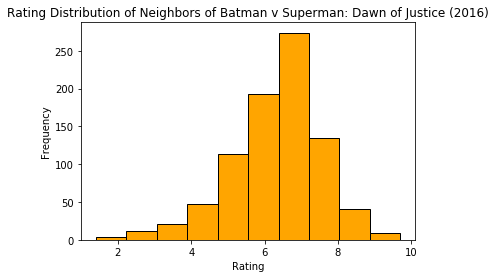

Average Rating: 6.328705882352948
Number of Neighbors: 1051
Movies having Ratings: 850


In [159]:
neighborRating = list()
for movie in bvsNeighbors:
    movie = movie.strip()
    movieName = movieIDMap[int(movie)]
    if movieName in ratingMap:
        neighborRating.append(float(ratingMap[movieName]))
        
res = plt.hist(neighborRating, align = "mid", color = "orange", edgecolor = "black")
print(res)
plt.title("Rating Distribution of Neighbors of Batman v Superman: Dawn of Justice (2016)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
avgRating = sum(neighborRating) / len(neighborRating)
print("Average Rating:", avgRating)
print("Number of Neighbors:", len(bvsNeighbors))
print("Movies having Ratings:", len(neighborRating))

(array([  6.,  13.,  29.,  49.,  62., 151., 141., 130.,  66.,  12.]), array([2.  , 2.71, 3.42, 4.13, 4.84, 5.55, 6.26, 6.97, 7.68, 8.39, 9.1 ]), <a list of 10 Patch objects>)


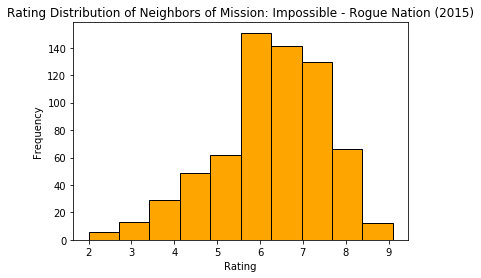

Average Rating: 6.236874051593324
Number of Neighbors: 803
Movies having Ratings: 659


In [160]:
neighborRating = list()
for movie in miNeighbors:
    movie = movie.strip()
    movieName = movieIDMap[int(movie)]
    if movieName in ratingMap:
        neighborRating.append(float(ratingMap[movieName]))
        
res = plt.hist(neighborRating, align = "mid", color = "orange", edgecolor = "black")
print(res)
plt.title("Rating Distribution of Neighbors of Mission: Impossible - Rogue Nation (2015)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
avgRating = sum(neighborRating) / len(neighborRating)
print("Average Rating:", avgRating)
print("Number of Neighbors:", len(miNeighbors))
print("Movies having Ratings:", len(neighborRating))

(array([  3.,   6.,  21.,  29.,  71., 156., 153., 165., 101.,  28.]), array([1.9 , 2.67, 3.44, 4.21, 4.98, 5.75, 6.52, 7.29, 8.06, 8.83, 9.6 ]), <a list of 10 Patch objects>)


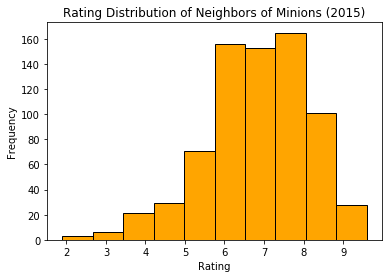

Average Rating: 6.829331514324697
Number of Neighbors: 772
Movies having Ratings: 733


In [161]:
neighborRating = list()
for movie in minNeighbors:
    movie = movie.strip()
    movieName = movieIDMap[int(movie)]
    if movieName in ratingMap:
        neighborRating.append(float(ratingMap[movieName]))
        
res = plt.hist(neighborRating, align = "mid", color = "orange", edgecolor = "black")
print(res)
plt.title("Rating Distribution of Neighbors of Minions (2015)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
avgRating = sum(neighborRating) / len(neighborRating)
print("Average Rating:", avgRating)
print("Number of Neighbors:", len(minNeighbors))
print("Movies having Ratings:", len(neighborRating))

## Question 10

In [138]:
#get community of the movies
bvsCommunity = -1
miCommunity = -1
minCommunity = -1

for i in range(len(communities)):
    if '12651' in communities[i]:
        bvsCommunity = i
    if '48394' in communities[i]:
        miCommunity = i
    if '100844' in communities[i]:
        minCommunity = i
        
print(bvsCommunity, miCommunity, minCommunity)

1 1 1


In [143]:
bvsNeighbors[:10]

['63\n',
 '283\n',
 '337\n',
 '358\n',
 '359\n',
 '1233\n',
 '1262\n',
 '1263\n',
 '1265\n',
 '1269\n']

In [141]:
communities[1].index('12651')

4233

(array([  4.,  11.,  21.,  45., 108., 181., 249., 131.,  38.,   8.]), array([1.4 , 2.23, 3.06, 3.89, 4.72, 5.55, 6.38, 7.21, 8.04, 8.87, 9.7 ]), <a list of 10 Patch objects>)


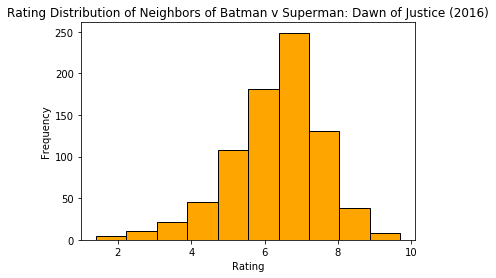

Average Rating: 6.319472361809057
Total Neighbors: 1051
Movies in the Same Community: 985
Movies having Ratings: 796


In [154]:
neighborRating = list()
neighborsInCommunity = 0
for movie in bvsNeighbors:
    movie = movie.strip()
    movieName = movieIDMap[int(movie)]
    if movie in communities[bvsCommunity]:
        neighborsInCommunity += 1
        if movieName in ratingMap:
            neighborRating.append(float(ratingMap[movieName]))
        
res = plt.hist(neighborRating, align = "mid", color = "orange", edgecolor = "black")
print(res)
plt.title("Rating Distribution of Neighbors of Batman v Superman: Dawn of Justice (2016)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
avgRating = sum(neighborRating) / len(neighborRating)
print("Average Rating:", avgRating)
print("Total Neighbors:", len(bvsNeighbors))
print("Movies in the Same Community:", neighborsInCommunity)
print("Movies having Ratings:", len(neighborRating))

(array([  3.,  12.,  26.,  41.,  52., 132., 121., 111.,  62.,  10.]), array([2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. , 7.7, 8.4, 9.1]), <a list of 10 Patch objects>)


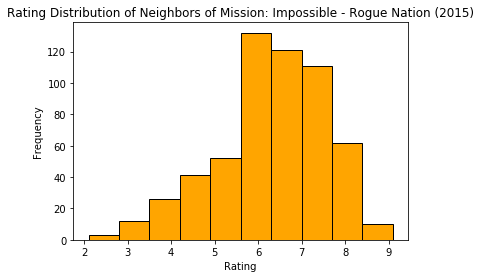

Average Rating: 6.263333333333333
Total Neighbors: 803
Movies in the Same Community: 706
Movies having Ratings: 570


In [155]:
neighborRating = list()
neighborsInCommunity = 0
for movie in miNeighbors:
    movie = movie.strip()
    movieName = movieIDMap[int(movie)]
    if movie in communities[miCommunity]:
        neighborsInCommunity += 1
        if movieName in ratingMap:
            neighborRating.append(float(ratingMap[movieName]))
        
res = plt.hist(neighborRating, align = "mid", color = "orange", edgecolor = "black")
print(res)
plt.title("Rating Distribution of Neighbors of Mission: Impossible - Rogue Nation (2015)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
avgRating = sum(neighborRating) / len(neighborRating)
print("Average Rating:", avgRating)
print("Total Neighbors:", len(miNeighbors))
print("Movies in the Same Community:", neighborsInCommunity)
print("Movies having Ratings:", len(neighborRating))

(array([  3.,   6.,  20.,  27.,  67., 131., 130., 148.,  96.,  28.]), array([1.9 , 2.67, 3.44, 4.21, 4.98, 5.75, 6.52, 7.29, 8.06, 8.83, 9.6 ]), <a list of 10 Patch objects>)


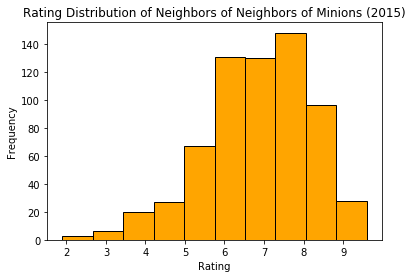

Average Rating: 6.8408536585365916
Total Neighbors: 772
Movies in the Same Community: 694
Movies having Ratings: 656


In [156]:
neighborRating = list()
neighborsInCommunity = 0
for movie in minNeighbors:
    movie = movie.strip()
    movieName = movieIDMap[int(movie)]
    if movie in communities[minCommunity]:
        neighborsInCommunity += 1
        if movieName in ratingMap:
            neighborRating.append(float(ratingMap[movieName]))
        
res = plt.hist(neighborRating, align = "mid", color = "orange", edgecolor = "black")
print(res)
plt.title("Rating Distribution of Neighbors of Neighbors of Minions (2015)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
avgRating = sum(neighborRating) / len(neighborRating)
print("Average Rating:", avgRating)
print("Total Neighbors:", len(minNeighbors))
print("Movies in the Same Community:", neighborsInCommunity)
print("Movies having Ratings:", len(neighborRating))

## Current End of Notebook

In [101]:
movieMap['Batman v Superman: Dawn of Justice (2016)']

12651

In [102]:
movieMap['Mission: Impossible - Rogue Nation (2015)']

48394

In [103]:
movieMap['Minions (2015)']

100844

In [158]:
'1269\n' in bvsNeighbors

True

In [190]:

print(movieIDMap[26906])
print(movieIDMap[12646])
print(movieIDMap[40754])
print(movieIDMap[11626])
print(movieIDMap[4334])

Eloise (2015)
The Justice League Part One (2017)
Into the Storm (2014)
Love and Honor (2013)
Man of Steel (2013)


In [168]:
print(movieIDMap[40106])
print(movieIDMap[40107])
print(movieIDMap[72245])
print(movieIDMap[87079])
print(movieIDMap[48390])

Fan (2015)
Phantom (2015)
Breaking the Bank (2014)
Suffragette (2015)
Now You See Me: The Second Act (2016)


In [169]:
print(movieIDMap[46198])
print(movieIDMap[20468])
print(movieIDMap[65505])
print(movieIDMap[77039])
print(movieIDMap[46219])

The Lorax (2012)
Inside Out (2015)
Up (2009)
Surf's Up (2007)
Despicable Me 2 (2013)


In [191]:
a = movieActors[26906]
for b in a:
    print(actorIDMap[b])

Alexander, Michael (XXXVI)
Bugard, Michael
Byrne, P.J.
Crawford, Chace
Dickerson, John (II)
Holmes, Tim (III)
Jackson, Brandon T.
Jhames, Tiren
Klebba, Martin
Meyer, Ralph H.
Miller, Dan John
Patrick, Robert (I)
Presley, LaTrallo
Seder, George
Wayne, Ricky
Burns, Tiffany (V)
Dushku, Eliza (I)
Fairbanks, Heather (II)
Forester, Nicole
Govich, Milica
Kitral, Annie
Nepa, Rose Anne (I)
Trovillion, Jordan


In [172]:
b = movieActors[48394]

In [176]:
c = list(set(a) & set(b))
for z in c:
    print(actorIDMap[z])

Jaworska, Mariola
Bernardeschi, Laura (I)
Zaruba, Miroslav
Cooper, Pamela Betsy
Zarubova, Tatiana
Meads, Pete
Sharma, Atul (V)
Horvath, Kornelia
Rajpal, Ricky
Ryder, Mark (VI)
Webster, Glenn (I)
Harrison, Noni
Awasti, Raj


In [177]:
for y in b:
    print(actorIDMap[y])

Anthony Milton
Atkins, Lasco
Awasti, Raj
Baldwin, Alec
Banks, Richard (VII)
Barber, Nigel
Bracq, Alexander
Coulston, Tom
Cronin, Sean (I)
Cruise, Tom
Cuffaro, Gioacchino Jim
Donald, Nick
Hamonde, Walles
Hanna, Salem
Harland, Daniel
Harris, Sean (I)
Hathaway, Alexander
Hayward, Justin (V)
Howard, Philip (VI)
Hultén, Jens
Ikhile, Osy
Jermaine, Vauxhall
Kalhan, Rajesh
Kerekes, Attila G.
Khoroshko, Denis
Lawrence, Bruce
Leon Martinez, Jorge
Lloyd, Wesley
Mayger, Martyn
McBurney, Simon
McDade, Stephen
Meads, Pete
Newnham, Shaun
Pegg, Simon
Radia, Sagar
Rajpal, Ricky
Renner, Jeremy
Rhames, Ving
Robinson, David G.
Ryder, Mark (VI)
Sharma, Atul (V)
Stanford, Peter (III)
Stegemann, Wolfgang
Weber Brown, James
Webster, Glenn (I)
Zaruba, Miroslav
Bernardeschi, Laura (I)
Bolton, Sal (I)
Buchanan, Jill (II)
Cooper, Pamela Betsy
Greasley, Claire
Gultniece, Guna
Harrison, Noni
Horvath, Kornelia
Jaworska, Mariola
Liebman, Simone (I)
Nagai, Shina Shihoko
Olivo, America
Stocker, Stella
Tearle, Georgie-M